# Air temperature Karlskrona
## Import necessary libraries and read the csv file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math
from statistics import mean
df = pd.read_csv("SMHI_Data.csv")
df



,Datum,Tid (UTC),Lufttemperatur
0,2010-03-01,00:00:00,2.0
1,2010-03-01,01:00:00,NaN
2,2010-03-01,02:00:00,2.2
3,2010-03-01,03:00:00,1.7
4,2010-03-01,04:00:00,1.7
...,...,...,...
113976,2023-01-01,02:00:00,6.2
113977,2023-01-01,03:00:00,6.5
113978,2023-01-01,04:00:00,7.7
113979,2023-01-01,05:00:00,8.7


## Data cleaning process
The steps we will take in order to clean the data is firstly.

### Missing values
Approximately 6% of the air temperature values are missing which is quite a lot in our opinion but not so many that it is impossible to clean the data and draw meaningful conclusions

In [3]:
null_values = df["Lufttemperatur"].isnull().sum()
df_length = len(df)

print(f"Missing values: {null_values}, Total values: {df_length}, Percentage missing: {(null_values / df_length) * 100}%")

Missing values: 6713, Total values: 113981, Percentage missing: 5.889578087575999%


Replace NAN values with the average of the two not NAN neighbouring values with equal distance to the subject value.

In [4]:
df["Cleaned"] = 0.0

def find_value(df, index):
    j = 0
    backward = df.at[index - j, "Lufttemperatur"]
    forward = df.at[index + j, "Lufttemperatur"]
    while math.isnan(backward) or math.isnan(forward):
        backward = df.at[index - j, "Lufttemperatur"]
        forward = df.at[index + j, "Lufttemperatur"]
        j+=1
    c = (backward+forward)/2
    
    return c

        
for index, row in df.iterrows():
    if index == 113980:
        df.at[index, "Cleaned"] = df.at[index-1, "Lufttemperatur"]
    else:
        df.at[index, "Cleaned"] = find_value(df, index)

df

,Datum,Tid (UTC),Lufttemperatur,Cleaned
0,2010-03-01,00:00:00,2.0,2.0
1,2010-03-01,01:00:00,NaN,2.1
2,2010-03-01,02:00:00,2.2,2.2
3,2010-03-01,03:00:00,1.7,1.7
4,2010-03-01,04:00:00,1.7,1.7
...,...,...,...,...
113976,2023-01-01,02:00:00,6.2,6.2
113977,2023-01-01,03:00:00,6.5,6.5
113978,2023-01-01,04:00:00,7.7,7.7
113979,2023-01-01,05:00:00,8.7,8.7


### Outliers
Using the moving trimmed mean to replace outliers and get more reasonable data.

In [5]:
df["Trimmed"] = 0.0

def find_value(df, index):
    neighbors = [df.at[index, "Cleaned"]]
    for i in range(1, 3):
        try:
            backward = df.at[index - i, "Cleaned"]
            forward = df.at[index + i, "Cleaned"]
            neighbors.append(backward)
            neighbors.append(forward)
        except:
            pass
    return st.trim_mean(neighbors, 0.3)


for index, row in df.iterrows():
    df.at[index, "Trimmed"] = find_value(df, index)

df

,Datum,Tid (UTC),Lufttemperatur,Cleaned,Trimmed
0,2010-03-01,00:00:00,2.0,2.0,2.000000
1,2010-03-01,01:00:00,NaN,2.1,2.100000
2,2010-03-01,02:00:00,2.2,2.2,1.933333
3,2010-03-01,03:00:00,1.7,1.7,1.833333
4,2010-03-01,04:00:00,1.7,1.7,1.633333
...,...,...,...,...,...
113976,2023-01-01,02:00:00,6.2,6.2,6.466667
113977,2023-01-01,03:00:00,6.5,6.5,6.966667
113978,2023-01-01,04:00:00,7.7,7.7,7.633333
113979,2023-01-01,05:00:00,8.7,8.7,8.366667


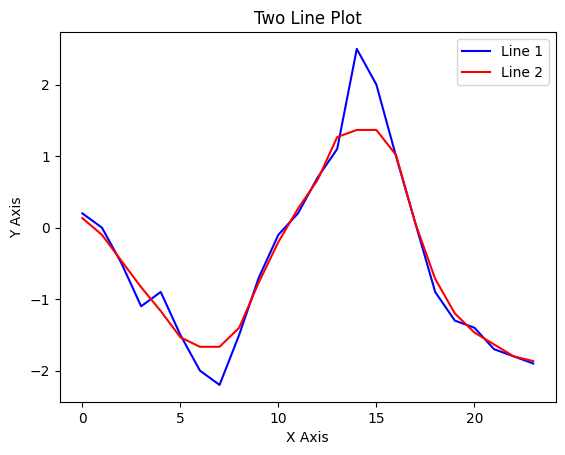

In [113]:
x = range(24)
y1 = df.Cleaned[24:48]
y2 = df.Trimmed[24:48]
plt.plot(x, y1, label='Line 1', color = "blue")
plt.plot(x, y2, label='Line 2', color="red")

# add a legend and labels
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Two Line Plot')


# display the plot
plt.show()